In [ ]:
# A) was produced using biorender

dict_keys(['assemble', 'asari', 'blank_masking', 'drop_samples', 'normalize', 'drop_missing_features', 'interpolate', 'log_transform', 'build_empCpds', 'MS1_annotate', 'MS2_annotate', 'L1_annotate', 'L1_annotate_w_MS2', 'finish'])
assemble 0.023162933190663655
asari 22.483538981278738
blank_masking 3.6936484018961586
drop_samples 2.1274808327356975
normalize 0.9697155157725016
drop_missing_features 0.3297377824783325
interpolate 0.16606318553288776
log_transform 0.15022805134455364
build_empCpds 0.32155609925587975
MS1_annotate 0.21889651616414388
MS2_annotate 162.63612131675083
L1_annotate 0.4936782519022624
L1_annotate_w_MS2 15.462415397167206
dict_keys(['assemble', 'convert', 'asari', 'blank_masking', 'drop_samples', 'normalize', 'drop_missing_features', 'interpolate', 'log_transform', 'build_empCpds', 'MS1_annotate', 'MS2_annotate', 'L1_annotate', 'L1_annotate_w_MS2'])
assemble 0.02141525348027547
convert 0.04020074605941772
asari 30.08604735136032
blank_masking 4.382085466384888
d

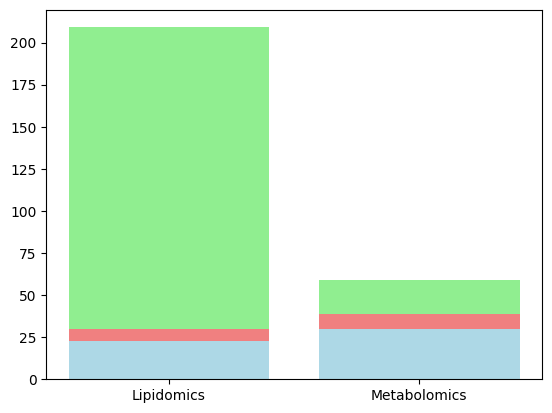

In [39]:
# Panel B
# this assumes you have first ran all of the workflows provided in the examples directory on datasets D1 through D6

import json
import matplotlib.pyplot as plt
lipidomics = json.load(open("/Users/mitchjo/Projects/PythonCentricPipelineForMetabolomics/examples/Analyses/Plasma_Lipidomics/experiment.json"))
metabolomics = json.load(open("/Users/mitchjo/Projects/PythonCentricPipelineForMetabolomics/examples/Analyses/Plasma_Metabolomics_HILIC_pos/experiment.json"))

for title, data in zip(["Lipidomics", "Metabolomics"], [lipidomics, metabolomics]):
    cmds = data["command_history"]
    total_time_elapsed = {}
    for i, cmd_1 in enumerate(cmds[:-1]):
        cmd_2 = cmds[i+1]
        time_1, cmd_1 = cmd_1.split(":")
        time_2, cmd_2 = cmd_2.split(":")
        subcommand = cmd_2.split(";")[1]
        time_used = float(time_2) - float(time_1)
        if subcommand not in total_time_elapsed:
            total_time_elapsed[subcommand] = 0
        total_time_elapsed[subcommand] += time_used / 60
    print(total_time_elapsed.keys())
    colors = {
        'assemble': 'lightblue',
        'asari': 'lightblue',
        'convert': 'lightblue',
        'blank_masking': 'lightcoral',
        'drop_samples': 'lightcoral',
        'drop_missing_features': 'lightcoral',
        'normalize': 'lightcoral',
        'batch_correct': 'lightcoral', 
        'log_transform': 'lightcoral',
        'interpolate': 'lightcoral',
        'build_empCpds': 'lightgreen',
        'L1_annotate': 'lightgreen',
        'L2_annotate': 'lightgreen',
        'L1_annotate_w_MS2': 'lightgreen',
        'MS1_annotate': 'lightgreen',
        'MS2_annotate': 'lightgreen',
        'finish': 'lightgreen'
    }


    subtotal = 0
    for sub, dt in total_time_elapsed.items():
        if sub not in {'finish', 'report'}:
            plt.bar(title, dt, bottom=subtotal, color=colors[sub])
            subtotal += dt
            print(sub, dt)
plt.show()


In [ ]:
# Panel C
# this requires running the XCMS and pcpfm comparison workflows in the examples directory